<a href="https://colab.research.google.com/github/Jorgiane/Jorgiane/blob/main/Trilha6%2C_tarefapeso3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import math

import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#packages
!pip install unidecode
!pip install fraction

# Load EDA Pkgs
import pandas as pd
import numpy as np
import random

# Load ML Pkgs
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('rslp')

#charts & others stuff
from unidecode import unidecode
import matplotlib.pyplot as plt
import re
import string
from fractions import Fraction

     |████████████████████████████████| 235 kB 5.3 MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [3]:
texto_verificar = np.array([
                            ("Desconhecido", "Publicação de Arnaldo Jabor", "Bolsonaro é um tipo de cara sem etiqueta, daqueles que encontramos coçando o saco no barzinho jogando bilhar. Apesar de ter mais estudo do que qualquer professor de humanas da geração Paulo Freire e mais inteligência emocional do que qualquer outro político brasileiro, não há polidez em suas palavras e tão pouco elegância em seu comportamento. Isso é o que mais incomoda artistas, jornalistas, feministas mal amadas e complexadas, homens frágeis, covardes oportunistas, religiosos falidos na luta contra a própria imoralidade, maconheiros, pedófilos, estupradores e toda patrulha do politicamente correto que suportou calada um circo de corrupção durante duas décadas, mas que agora é ferida com as palavras do presidente “não pudico”. Bolsonaro é o milico com piadinhas sem graça, é o tiozão que pergunta se já temos pentelho, é um elefante em uma loja de cristais, mas o que me faz a cada dia gostar mais desse cara, é o tipo de gente que não gosta dele, que se ofende com tudo que o cara faz, que do óleo venezuelano em nossas praias à histeria mundial perante o coronavírus, buscam um meio de responsabilizá-lo. Bolsonaro realmente é o cara que você passa gostar, quando vê o lixo de gente que não gosta dele."),
                            ("Desconhecido", "Crônica inteligente de Arnaldo Jabor", "Brasileiro… Brasileiro é um povo solidário. Mentira. Brasileiro é babaca. Eleger para o cargo mais importante do Estado um sujeito que não tem escolaridade e preparo nem para ser gari, só porque tem uma história de vida sofrida; Pagar 40% de sua renda em tributos e ainda dar esmola para pobre na rua ao invés de cobrar do governo uma solução para pobreza;\nAceitar que ONG’s de direitos humanos fiquem dando pitaco na forma como tratamos nossa criminalidade… Não protestar cada vez que o governo compra colchões para presidiários que queimaram os deles de propósito, não é coisa de gente solidária. É coisa de gente otária.\nBrasileiro é um povo alegre. Mentira. Brasileiro é bobalhão. Fazer piadinha com as imundices que acompanhamos todo dia é o mesmo que tomar bofetada na cara e dar risada. Depois de um massacre que durou quatro dias em São Paulo, ouvir o José Simão fazer piadinha a respeito e achar graça, é o mesmo que contar piada no enterro do pai. Brasileiro tem um sério problema. Quando surge um escândalo, ao invés de protestar e tomar providências como cidadão, ri feito bobo."),
                            ("Arnaldo Jabor CBN", "Muita gente quer votar em Bolsonaro para se vingar", "Amigos ouvintes, vocês assistiram aos debates dos jornalistas com os candidatos Jair Bolsonaro e Marina Silva. Não, pois perderam a chance de ver o absurdo que se avizinha no horizonte com nossos possíveis eleitos para presidência. É incrível. Primeiro Bolsonaro no programa Roda Viva foi um show de absurdos. Uma janelinha aberta para vermos a incompetência do homem. Creio também que os jornalistas, que são todos ótimos aliás, perderam a chance de fazer perguntas que decifrassem o enigma de sua utopia de caserna. O tempo todo ele se defendeu com a velha técnica dos reacionários sem razão que falam bem rápido, confusamente, de propósito para deixar a impressão de que algo foi respondido quando nada aconteceu. A maioria das perguntas tinha por fito provar que o Bolsonaro é um despreparado, careta, preconceituoso, racista, etc. E perguntaram sobre aborto, mundo gay, estupro, relação com mulheres. Mas poderiam ter perguntado sobre o que planos ele teria pelo seu eventual governo. O povo que poderá votar nele está preocupado se ele gosta de gay ou não. Se aborto pode ou não pode. Ora francamente o povão bolsonarista quer denúncias violentas, ameaças machistas contra o crime que era uma espécie de trumpzinho de gericinó, dizendo que vai botar pra quebrar. E o maior perigo é que muita gente ignorante vai votar nele para se vingar do Brasil. Isso! Esse Brasil está em crise e o que muitos querem quebrar. De raiva. Isso é muito perigoso. \nEu vi também a entrevista que a Marina Silva deu para outro grupo de jornalistas no dia seguinte. Meu Deus! Que coisa mais frágil! Que coisa mais pobre de ideias. Que coisa triste ver aquela boa mulher de ótimo caráter sem dúvida, mas sentadinha ali com sua vozinha falando em ética e ideias gerais sobre o país e visivelmente tentando encontrar um caminho entre um liberalismo maior e pequenas reverências aos petistas perdidos. Uma senhora sem força para ser presidente e um neonazista sem rumo. Não há um só programinha para o país dessa gente. Realmente é de gelar o sangue. O Brasil com candidatos risíveis, de chanchada, sem contar com os outros que vem aí como perigosíssimo Ciro Gomes. É triste pois como dizia um amigo meu o Brasil não tem pessoal.")
])
df_ver = pd.DataFrame(data=texto_verificar, columns=["author", 'title', "content"])
df_ver.head()

,author,title,content
0,Desconhecido,Publicação de Arnaldo Jabor,"Bolsonaro é um tipo de cara sem etiqueta, daqu..."
1,Desconhecido,Crônica inteligente de Arnaldo Jabor,Brasileiro… Brasileiro é um povo solidário. Me...
2,Arnaldo Jabor CBN,Muita gente quer votar em Bolsonaro para se vi...,"Amigos ouvintes, vocês assistiram aos debates ..."


In [4]:
df_aj = pd.read_json('https://raw.githubusercontent.com/lucianomcsilva/articulistas/main/UolBlogs.json')
df_aj = df_aj.loc[df_aj['author'] == 'Mauricio Stycer' ]

In [5]:
df_aj['words'] = df_aj['content'].str.split().str.len()

In [6]:
df_aj = df_aj.loc[(df_aj['words'] > 100)]

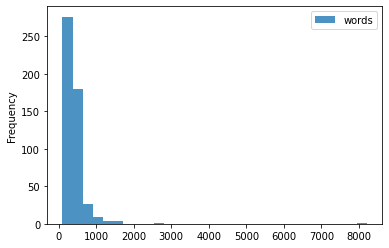

In [7]:
df_aj.plot.hist(bins=30, alpha=0.8)

In [8]:
stop = stopwords.words('portuguese')
# stop.append('nao')
stop2 = list()
for word in stop:
  stop2.append(unidecode(word))
  
stemmer = nltk.stem.RSLPStemmer()

In [9]:
# remoção de palavras de parada
df_aj['content_treated'] = df_aj['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_ver['content_treated'] = df_ver['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [10]:
df_aj['content_treated'] = df_aj['content_treated'].str.lower().apply(lambda x: unidecode(x))
df_ver['content_treated'] = df_ver['content_treated'].str.lower().apply(lambda x: unidecode(x))

In [11]:
df_aj['content_treated'] = df_aj['content_treated'].str.replace('[{}]'.format(string.punctuation), ' ')
df_ver['content_treated'] = df_ver['content_treated'].str.replace('[{}]'.format(string.punctuation), ' ')

In [12]:
df_aj['content_treated'] = df_aj['content_treated'].str.replace('[{}]'.format(string.digits), '')
df_ver['content_treated'] = df_ver['content_treated'].str.replace('[{}]'.format(string.digits), '')

In [13]:
df_aj['content_treated'] = df_aj['content_treated'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))
df_ver['content_treated'] = df_ver['content_treated'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82e4c1e7d0>]],
      dtype=object)

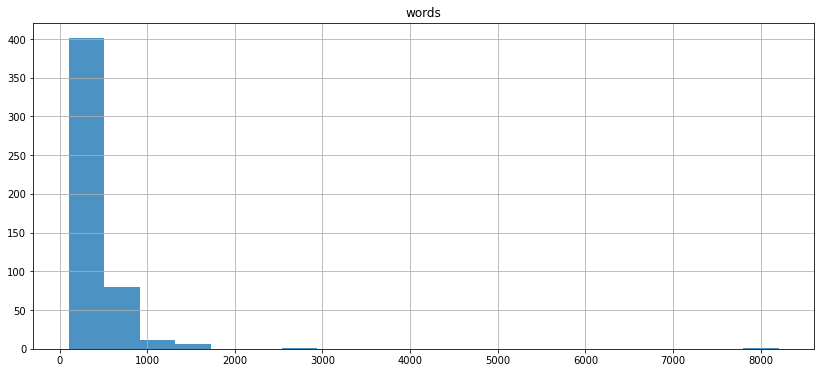

In [14]:
df_aj.hist(bins=20, alpha=0.8, figsize=(14,6))

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer()

In [16]:
XAJ = vectorizer.fit_transform(df_aj['content_treated'])
vocabulary_aj = vectorizer.get_feature_names()
pdXAJ = pd.DataFrame(data=XAJ.toarray(), columns=vocabulary_aj)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
XVER = vectorizer.fit_transform(df_ver['content_treated'])
vocabulary_ver = vectorizer.get_feature_names()
pdXVER = pd.DataFrame(data=XVER.toarray(), columns=vocabulary_ver)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
len(vocabulary_aj)
df_XAJ = pdXAJ.T
df_XAJ['total_aj'] = df_XAJ.sum(axis=1) 
#pdXAJ[['tudo', 'ser', 'hoje', 'grande', 'brasileiro', 'mundo', 'vida', 'morte', 'morrer', 'otario', 'ahh', 'anos', 'nada', 'futuro']]
pdXAJ

,aacd,ab,abadas,abafa,abafar,abaixo,abaixou,abala,abalada,abaladas,abalado,abalados,abalar,abalou,abandona,abandonado,abandonam,abandonamos,abandonar,abandonou,abastece,abatida,abatido,abel,abencoado,aberta,abertamente,abertas,aberto,abertos,abertura,abismo,aborda,abordado,abordagem,abordar,abordara,abordou,aborrecido,aborto,...,yitzhak,yolanda,york,yorker,yoruba,you,youtube,youtuber,yusuf,yyyurisilva,zacarias,zagonel,zattar,zbignew,ze,zeballos,zeca,zelia,zelo,zemel,zemelmacher,zerbini,zero,zeze,ziel,ziembinski,zilda,zimmerle,ziskind,zoeira,zombaria,zombou,zona,zonas,zoom,zootecnista,zoran,zorra,zucatelli,zwetsch
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df_XAJ = pdXAJ.T

In [20]:
df_XAJ['total_aj'] = df_XAJ.sum(axis=1)

In [21]:
df_XAJ.drop(df_XAJ.columns[0:len(df_aj['content'])], axis=1, inplace=True)

In [22]:
df_XAJ = df_XAJ.sort_values(by='total_aj', ascending=False)

In [23]:
pdXAJT = pdXAJ.T

In [24]:
pdXAJT['present'] = (pdXAJT.ne(0).sum(axis=1) -1) / len(df_aj['content'])
pdXAJT['not_present'] = pdXAJT.eq(0).sum(axis=1) / len(df_aj['content'])

In [25]:
pdXAJT.drop(pdXAJT.columns[0:len(df_aj['content'])], axis=1, inplace=True)

In [26]:
pdXAJT = pdXAJT.sort_values(by='present', ascending=True)

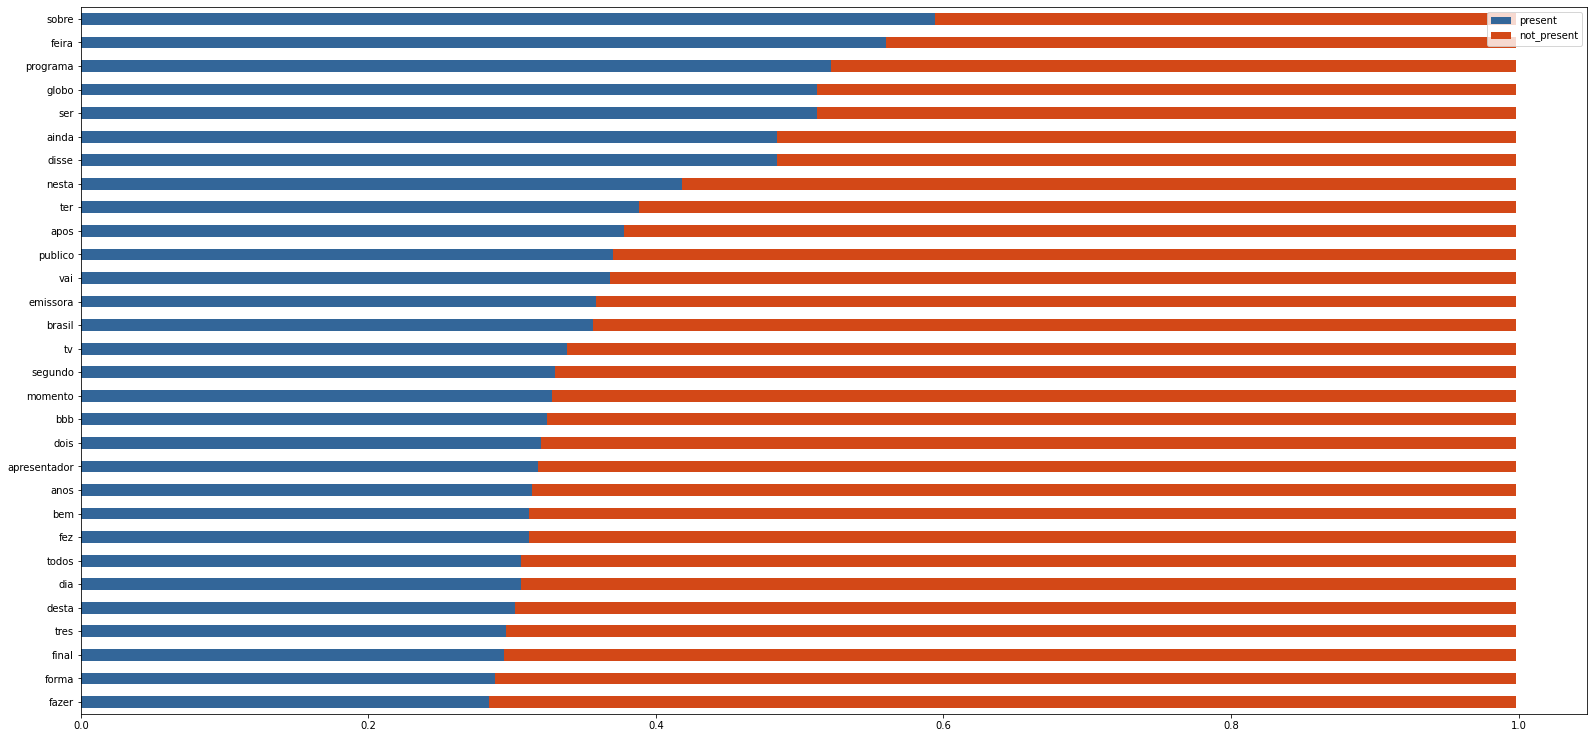

In [27]:
pdXAJT.tail(30).plot.barh(stacked=True, color=['#336699', '#D34817'], figsize=(27,13))

In [28]:
pdXAJT.tail(30)

,present,not_present
fazer,0.284,0.714
forma,0.288,0.710
final,0.294,0.704
tres,0.296,0.702
desta,0.302,0.696
dia,0.306,0.692
todos,0.306,0.692
fez,0.312,0.686
bem,0.312,0.686
anos,0.314,0.684
